# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

### Data Overview
The data set is from Inside AirBnb. The detailed description of the different column parameters are given below:

* id: A unique number identifying an Airbnb listing.
* host_id: A unique number identifying an Airbnb host.
* host_name: Name of the host.
* neighborhood: A subregion of the city or search area for which the survey is carried out. 
* latitude: Listing latitude
* longtitude: Listing longtitude
* room_type: One of “Entire home/apt”, “Private room”, “Shared room”, or "Hotel room".
* price: The price (in $US) for a night stay.
* minimum_nights: The required minimum stay for a visit, as posted by the host.
* number_of_reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.
* last review:  Date of last review
* reviews_per_month: The number of reviews that a listing has received per month.
* calculated_host_listings_count: The total number of listings for a particular host.
* availability_365: The number of days for which a particular host is available in a year
* number_of_reviews_ltm: The number of reviews within last month
* license: If host is licensed. According to the law, specific short-term rentals require a license.
* host location: Where the host is located.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Loading data

In [2]:
listing = pd.read_csv('listings.csv')
listing.head()

id                                            name  host_id host_name  \
0    2384                    Hyde Park - Walk to UChicago     2613   Rebecca   
1   94450             Comfy Garden Suite in Andersonville   504470      Mark   
2  145659     Trendy Roscoe Village 3BR/2BR walk to shops   683529       Joe   
3    7126             Tiny Studio Apartment 94 Walk Score    17928     Sarah   
4  189821  Best in Chicago, private, amazing garden space   899757   Meighan   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN     Hyde Park  41.78790  -87.58780     Private room   
1                  NaN     Edgewater  41.97960  -87.66512  Entire home/apt   
2                  NaN  North Center  41.94342  -87.68121  Entire home/apt   
3                  NaN     West Town  41.90166  -87.68021  Entire home/apt   
4                  NaN  Logan Square  41.92918  -87.70219  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               3                212    3/4/2023               2.13   
1     65               7                  7   12/1/2022               0.88   
2    198               2                 59  12/31/2022               0.65   
3     85               2                483   2/26/2023               2.89   
4    202               3                598   2/25/2023               4.27   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               347                     20   
1                               1               178                      7   
2                              22               330                     15   
3                               1               279                     48   
4                               1               207                     24   

        license  
0  R17000015609  
1  R22000082956  
2       2209272  
3  R21000075737  
4  R21000062936

In [3]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

listing_id       date
0        2384   1/9/2015
1        2384  3/24/2015
2        2384  4/19/2015
3        2384  4/30/2015
4        2384   5/4/2015

In [4]:
#rename "id" in the listing dataframe to "listing_id"
listing = listing.rename(columns={'id': 'listing_id'})
listing.head()

listing_id                                            name  host_id  \
0        2384                    Hyde Park - Walk to UChicago     2613   
1       94450             Comfy Garden Suite in Andersonville   504470   
2      145659     Trendy Roscoe Village 3BR/2BR walk to shops   683529   
3        7126             Tiny Studio Apartment 94 Walk Score    17928   
4      189821  Best in Chicago, private, amazing garden space   899757   

  host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0   Rebecca                  NaN     Hyde Park  41.78790  -87.58780   
1      Mark                  NaN     Edgewater  41.97960  -87.66512   
2       Joe                  NaN  North Center  41.94342  -87.68121   
3     Sarah                  NaN     West Town  41.90166  -87.68021   
4   Meighan                  NaN  Logan Square  41.92918  -87.70219   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     90               3                212    3/4/2023   
1  Entire home/apt     65               7                  7   12/1/2022   
2  Entire home/apt    198               2                 59  12/31/2022   
3  Entire home/apt     85               2                483   2/26/2023   
4  Entire home/apt    202               3                598   2/25/2023   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               2.13                               1               347   
1               0.88                               1               178   
2               0.65                              22               330   
3               2.89                               1               279   
4               4.27                               1               207   

   number_of_reviews_ltm       license  
0                     20  R17000015609  
1                      7  R22000082956  
2                     15       2209272  
3                     48  R21000075737  
4                     24  R21000062936

In [5]:
#combine the two dataframes
listing.merge(reviews, on='listing_id', how='left')

listing_id                                              name  \
0                     2384                      Hyde Park - Walk to UChicago   
1                     2384                      Hyde Park - Walk to UChicago   
2                     2384                      Hyde Park - Walk to UChicago   
3                     2384                      Hyde Park - Walk to UChicago   
4                     2384                      Hyde Park - Walk to UChicago   
...                    ...                                               ...   
357376  808048225308192000   Stunning 2 Floor Penthouse Downtown - Sleeps 12   
357377  808048225308192000   Stunning 2 Floor Penthouse Downtown - Sleeps 12   
357378  808067261823221000  Fully furnished 2BR w/ Cozy Living Room & Wi-Fi!   
357379  808067261823221000  Fully furnished 2BR w/ Cozy Living Room & Wi-Fi!   
357380  808108595377919000   Cloud9| Up to 14 | Full amenities | The Wrigley   

          host_id host_name  neighbourhood_group neighbourhood   latitude  \
0            2613   Rebecca                  NaN     Hyde Park  41.787900   
1            2613   Rebecca                  NaN     Hyde Park  41.787900   
2            2613   Rebecca                  NaN     Hyde Park  41.787900   
3            2613   Rebecca                  NaN     Hyde Park  41.787900   
4            2613   Rebecca                  NaN     Hyde Park  41.787900   
...           ...       ...                  ...           ...        ...   
357376  170785489       Dmd                  NaN     West Town  41.900671   
357377  170785489       Dmd                  NaN     West Town  41.900671   
357378  490752114     Sevyn                  NaN   Rogers Park  42.016381   
357379  490752114     Sevyn                  NaN   Rogers Park  42.016381   
357380  248760412    Cloud9                  NaN     West Town  41.896177   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -87.587800     Private room     90               3                212   
1      -87.587800     Private room     90               3                212   
2      -87.587800     Private room     90               3                212   
3      -87.587800     Private room     90               3                212   
4      -87.587800     Private room     90               3                212   
...           ...              ...    ...             ...                ...   
357376 -87.658671  Entire home/apt    351               1                  3   
357377 -87.658671  Entire home/apt    351               1                  3   
357378 -87.665129  Entire home/apt     81               1                  2   
357379 -87.665129  Entire home/apt     81               1                  2   
357380 -87.653260  Entire home/apt   1017               2                  1   

       last_review  reviews_per_month  calculated_host_listings_count  \
0         3/4/2023               2.13                               1   
1         3/4/2023               2.13                               1   
2         3/4/2023               2.13                               1   
3         3/4/2023               2.13                               1   
4         3/4/2023               2.13                               1   
...            ...                ...                             ...   
357376    3/9/2023               3.00                              39   
357377    3/9/2023               3.00                              39   
357378   3/12/2023               1.58                               9   
357379   3/12/2023               1.58                               9   
357380    2/5/2023               0.70                              39   

        availability_365  number_of_reviews_ltm       license       date  
0                    347                     20  R17000015609   1/9/2015  
1                    347                     20  R17000015609  3/24/2015  
2                    347                     20  R17000015609  4/19

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [6]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      7747 non-null   int64  
 1   name                            7747 non-null   object 
 2   host_id                         7747 non-null   int64  
 3   host_name                       7747 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7747 non-null   object 
 6   latitude                        7747 non-null   float64
 7   longitude                       7747 non-null   float64
 8   room_type                       7747 non-null   object 
 9   price                           7747 non-null   int64  
 10  minimum_nights                  7747 non-null   int64  
 11  number_of_reviews               7747 non-null   int64  
 12  last_review                     62

In [7]:
listing.describe()

listing_id       host_id  neighbourhood_group     latitude  \
count  7.747000e+03  7.747000e+03                  0.0  7747.000000   
mean   2.650872e+17  1.617357e+08                  NaN    41.895250   
std    3.448603e+17  1.526951e+08                  NaN     0.061759   
min    2.384000e+03  2.153000e+03                  NaN    41.650640   
25%    3.094478e+07  3.288698e+07                  NaN    41.867725   
50%    4.973334e+07  1.074344e+08                  NaN    41.898470   
75%    6.629074e+17  2.574644e+08                  NaN    41.938337   
max    8.495391e+17  5.056757e+08                  NaN    42.022200   

         longitude         price  minimum_nights  number_of_reviews  \
count  7747.000000   7747.000000      7747.00000        7747.000000   
mean    -87.662637    184.285917        14.45850          45.938815   
std       0.043208   1160.005899        42.24804          86.832868   
min     -87.847243      0.000000         1.00000           0.000000   
25%     -87.686305     77.000000         2.00000           1.000000   
50%     -87.657760    124.000000         2.00000          13.000000   
75%     -87.631890    189.000000        32.00000          54.000000   
max     -87.529541  99998.000000      1125.00000        3091.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count        6254.000000                     7747.000000       7747.000000   
mean            1.788647                       63.763909        201.508842   
std             1.822491                      181.536834        128.669299   
min             0.010000                        1.000000          0.000000   
25%             0.490000                        1.000000         83.000000   
50%             1.430000                        3.000000        216.000000   
75%             2.630000                       14.000000        329.000000   
max            58.470000                      658.000000        365.000000   

       number_of_reviews_ltm  
count            7747.000000  
mean               13.553246  
std                23.177558  
min                 0.000000  
25%                 0.000000  
50%                 5.000000  
75%                22.000000  
max              1074.000000

A quick glance at the data shows that there are: 7747 unique listings in Chicago in total. An average of 66 reviews were written. The price for a listing ranges from zero per night to around $10,000 per night.

In [8]:
listing.price.isnull().sum()

0

In [9]:
#Print all the columns names
listing.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [10]:
listing['neighbourhood'].unique()

array(['Hyde Park', 'Edgewater', 'North Center', 'West Town',
       'Logan Square', 'Pullman', 'Lake View', 'Lincoln Park',
       'Irving Park', 'Near South Side', 'West Ridge', 'Woodlawn',
       'Near West Side', 'Avondale', 'Bridgeport', 'Kenwood',
       'Humboldt Park', 'Loop', 'Lower West Side', 'Uptown',
       'Lincoln Square', 'Portage Park', 'Washington Park', 'Forest Glen',
       'South Lawndale', 'Near North Side', 'Grand Boulevard',
       'East Garfield Park', 'Morgan Park', 'Rogers Park', 'Dunning',
       'North Lawndale', 'West Lawn', 'South Shore', 'Beverly',
       'Armour Square', 'Hegewisch', 'Albany Park', 'South Deering',
       'Jefferson Park', 'Ashburn', 'Douglas', 'Greater Grand Crossing',
       'West Elsdon', 'Austin', 'Hermosa', 'Norwood Park',
       'Garfield Ridge', 'West Garfield Park', 'North Park',
       'Mckinley Park', 'Oakland', 'Belmont Cragin', 'Edison Park',
       'Brighton Park', 'Archer Heights', 'Englewood', 'Chicago Lawn',
       'Sout

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

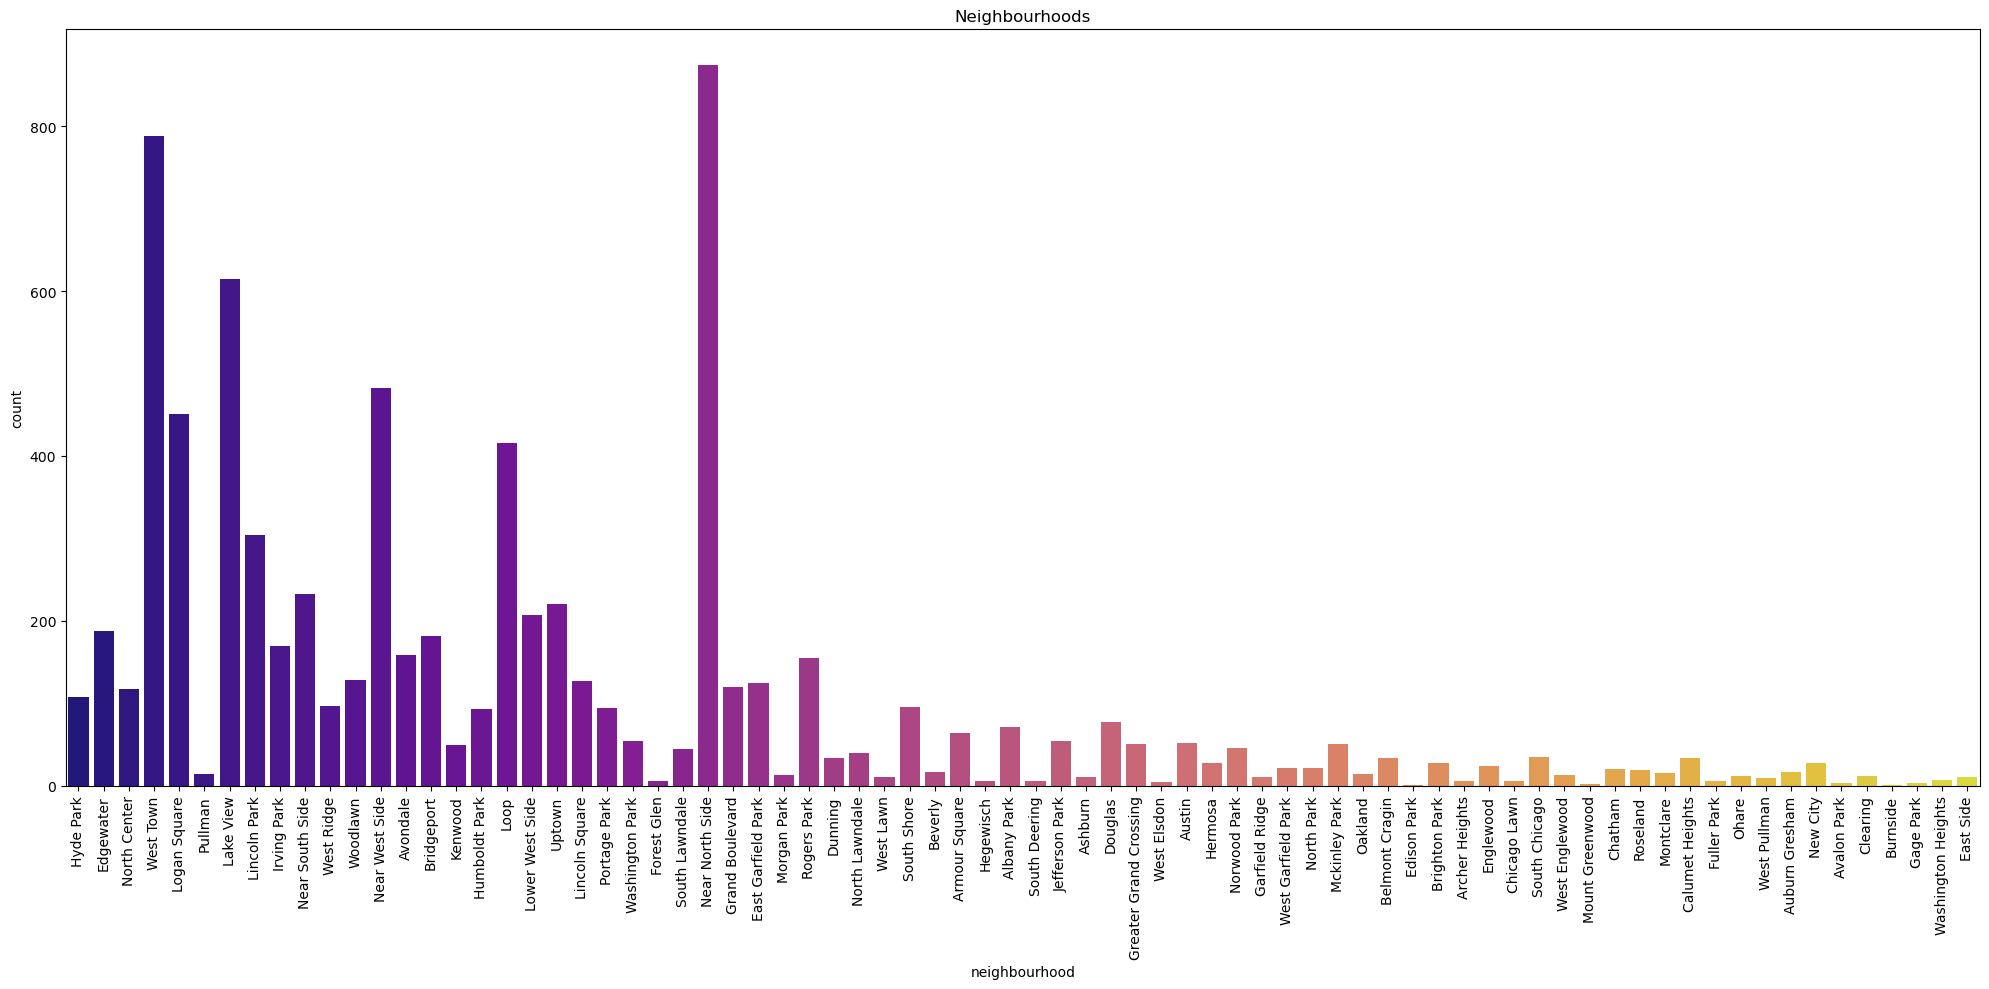

In [11]:
#Plot all Neighbourhoods
sns.countplot(x='neighbourhood', data=listing, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhoods')
plt.xticks(rotation=90)
plt.tight_layout()

Below, we can see the different locations and the availability of rentals in a year.

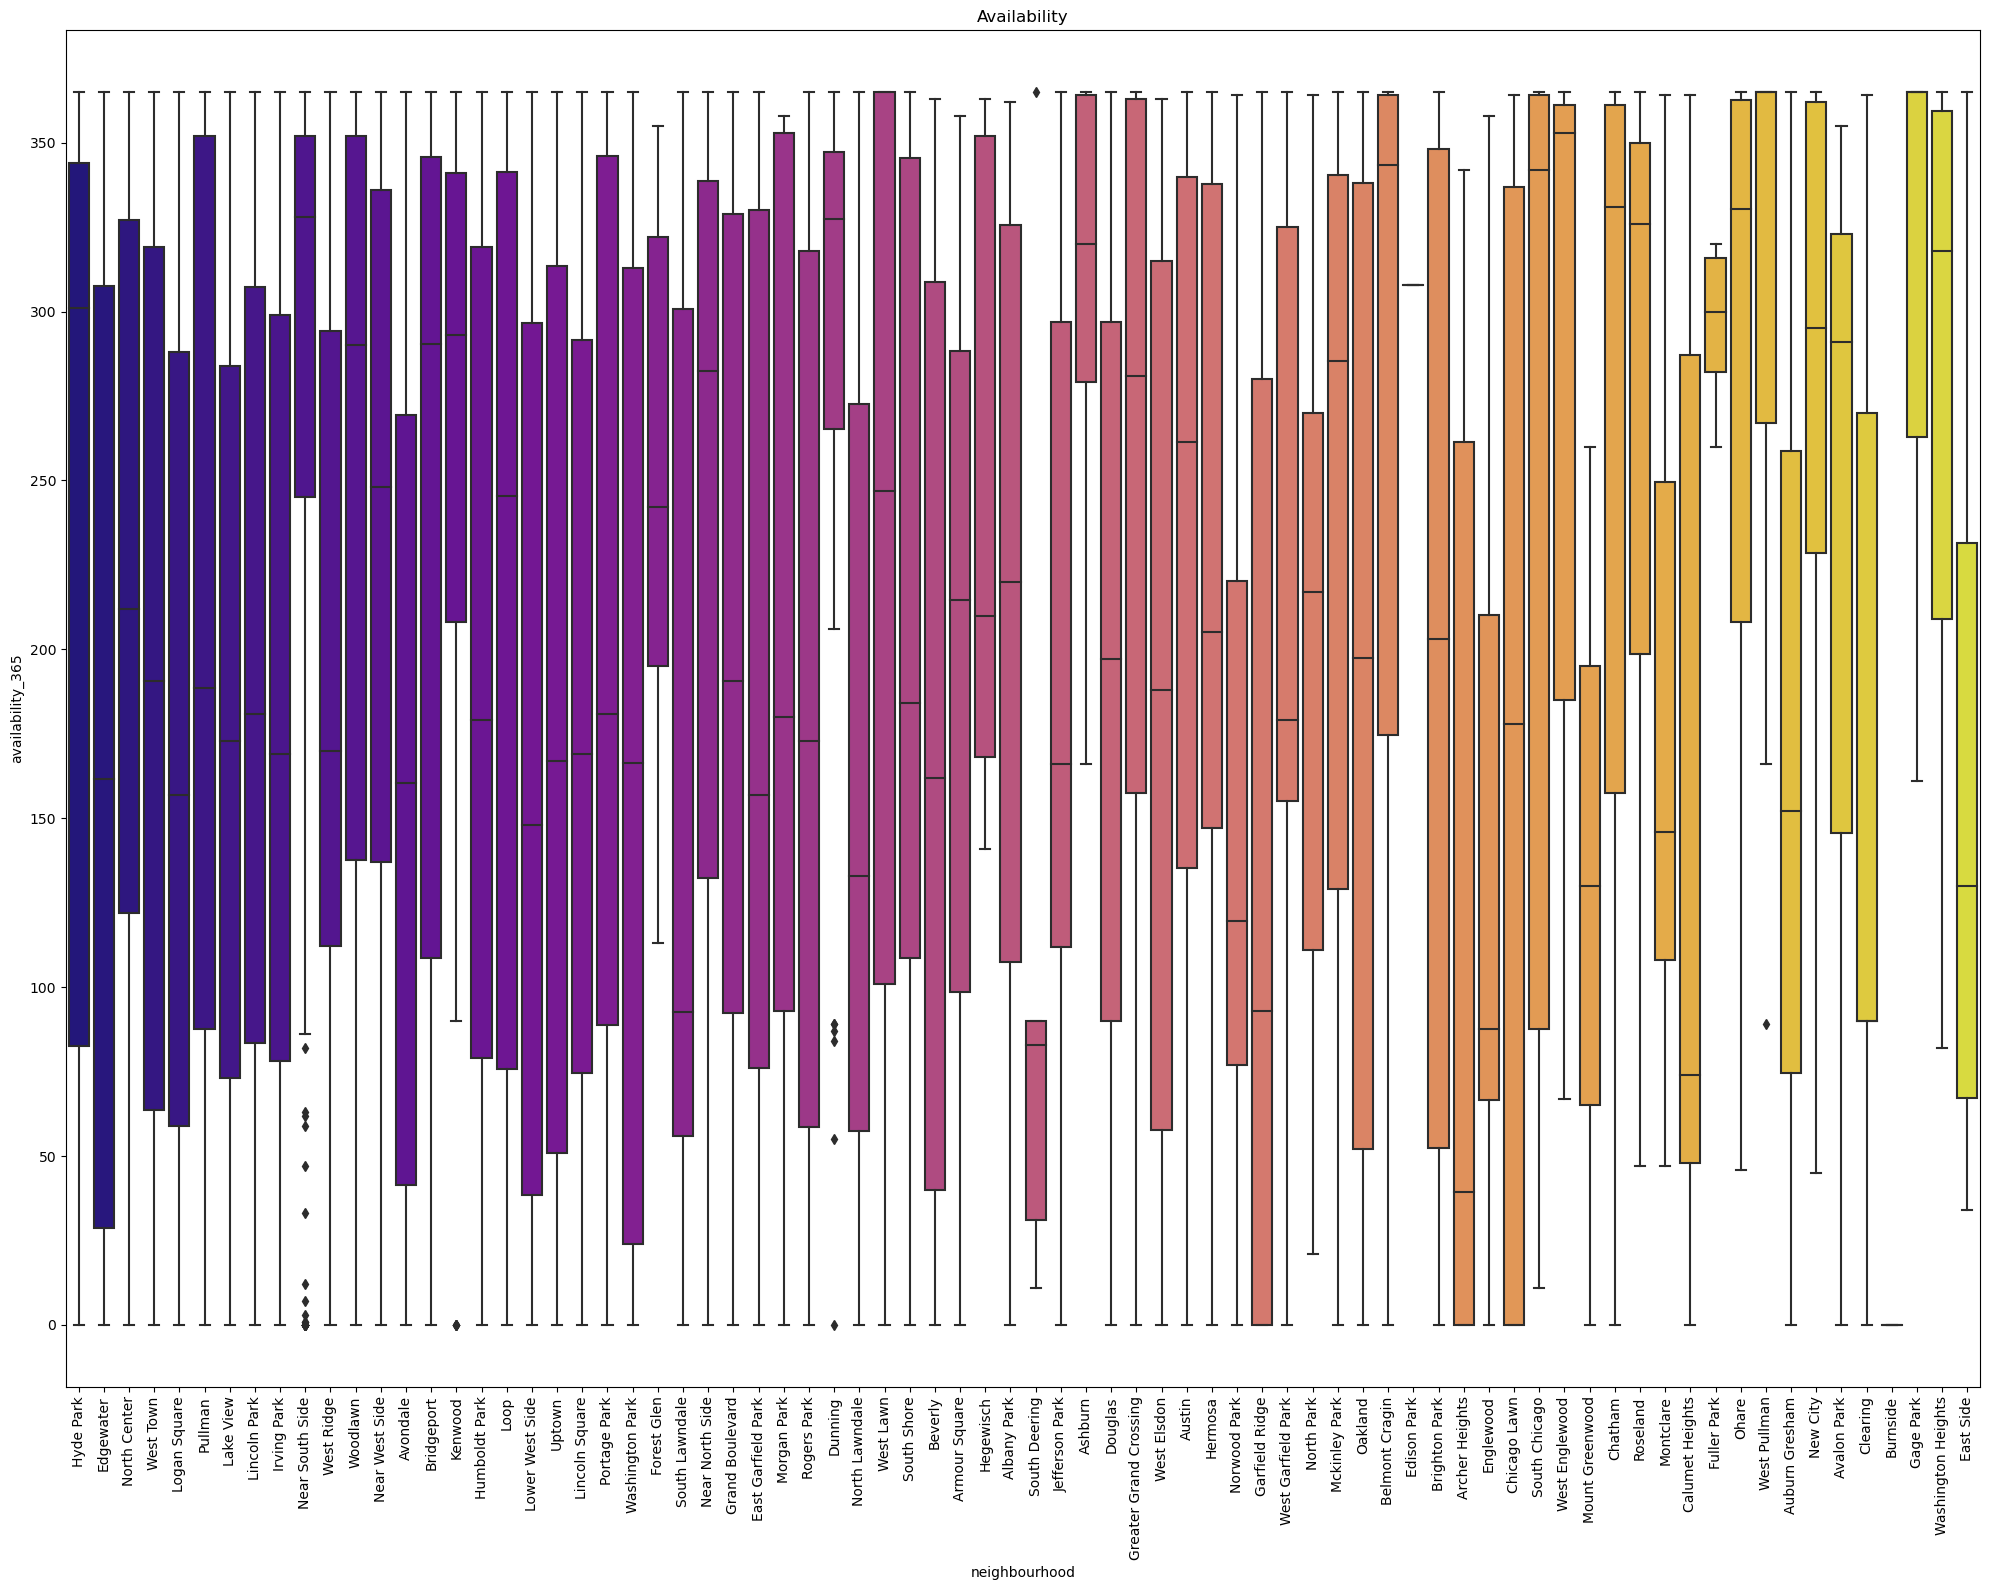

In [12]:
plt.figure(figsize=(20,16))
ax = sns.boxplot(data=listing, x='neighbourhood',y='availability_365',palette='plasma')
plt.title('Availability')
plt.xticks(rotation=90)
plt.tight_layout()

Let's take a look at all the listings on a map

In [13]:
## Setting up the Visualization..
fig = px.scatter_mapbox(listing, 
                        lat="latitude", 
                        lon="longitude", 
                        color="neighbourhood", 
#                         size="price",
#                         color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=30, 
                        opacity = .70,
                        zoom=10,
                       )
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or 
# "stamen-watercolor" yeild maps composed of raster tiles from various public tile servers which do 
# not require signups or access tokens
# fig.update_layout(mapbox_style="carto-positron", 
#                  )
fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Chicago Airbnb by Neighbourhood<br>(Click legend to toggle neighbourhood)', height = 800)
fig.show()

Which locations have the most listings?

C:\Users\mdkro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



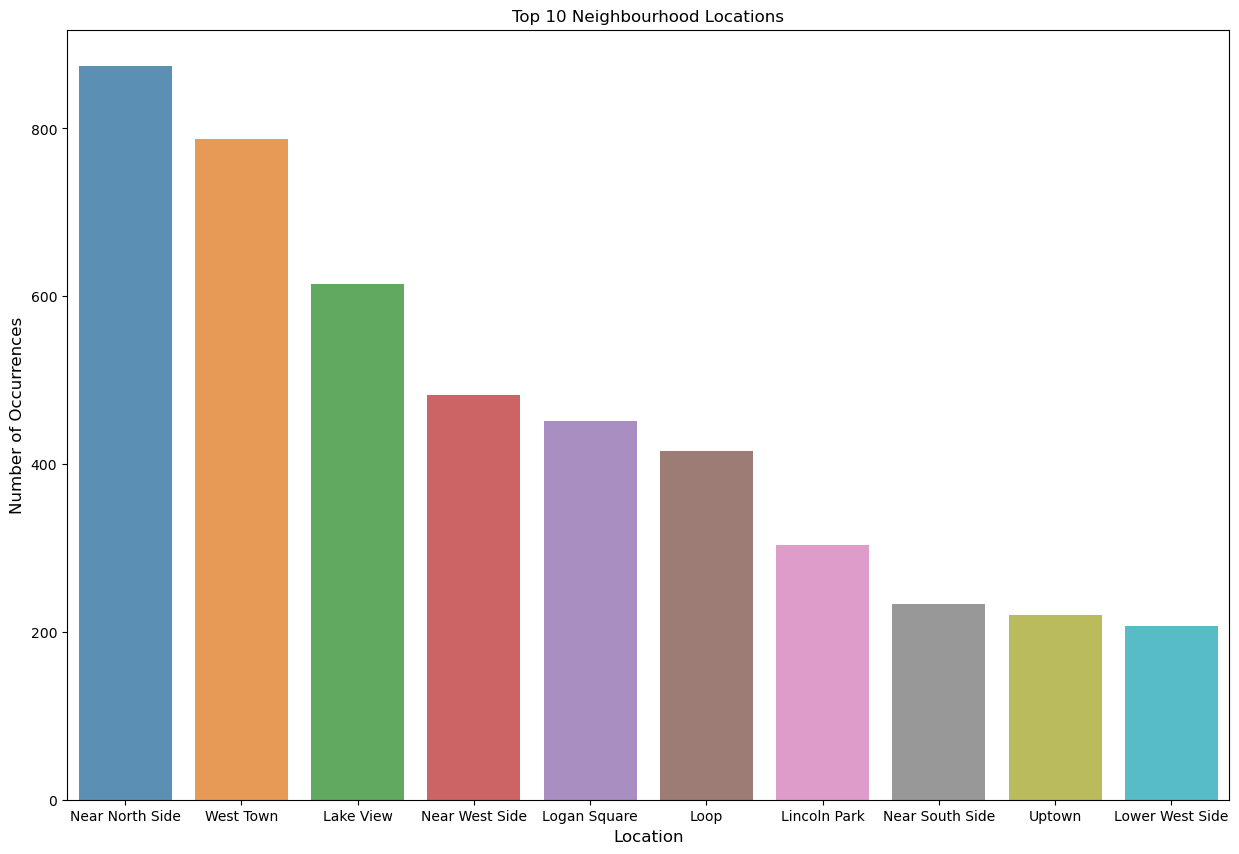

In [14]:
neighbourhood  = listing['neighbourhood'].value_counts()
neighbourhood = neighbourhood[:10,]
plt.figure(figsize=(15,10))
sns.barplot(neighbourhood.index, neighbourhood.values, alpha=0.8)
plt.title('Top 10 Neighbourhood Locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.show()

Let's look at the average price of listing for the different locations.

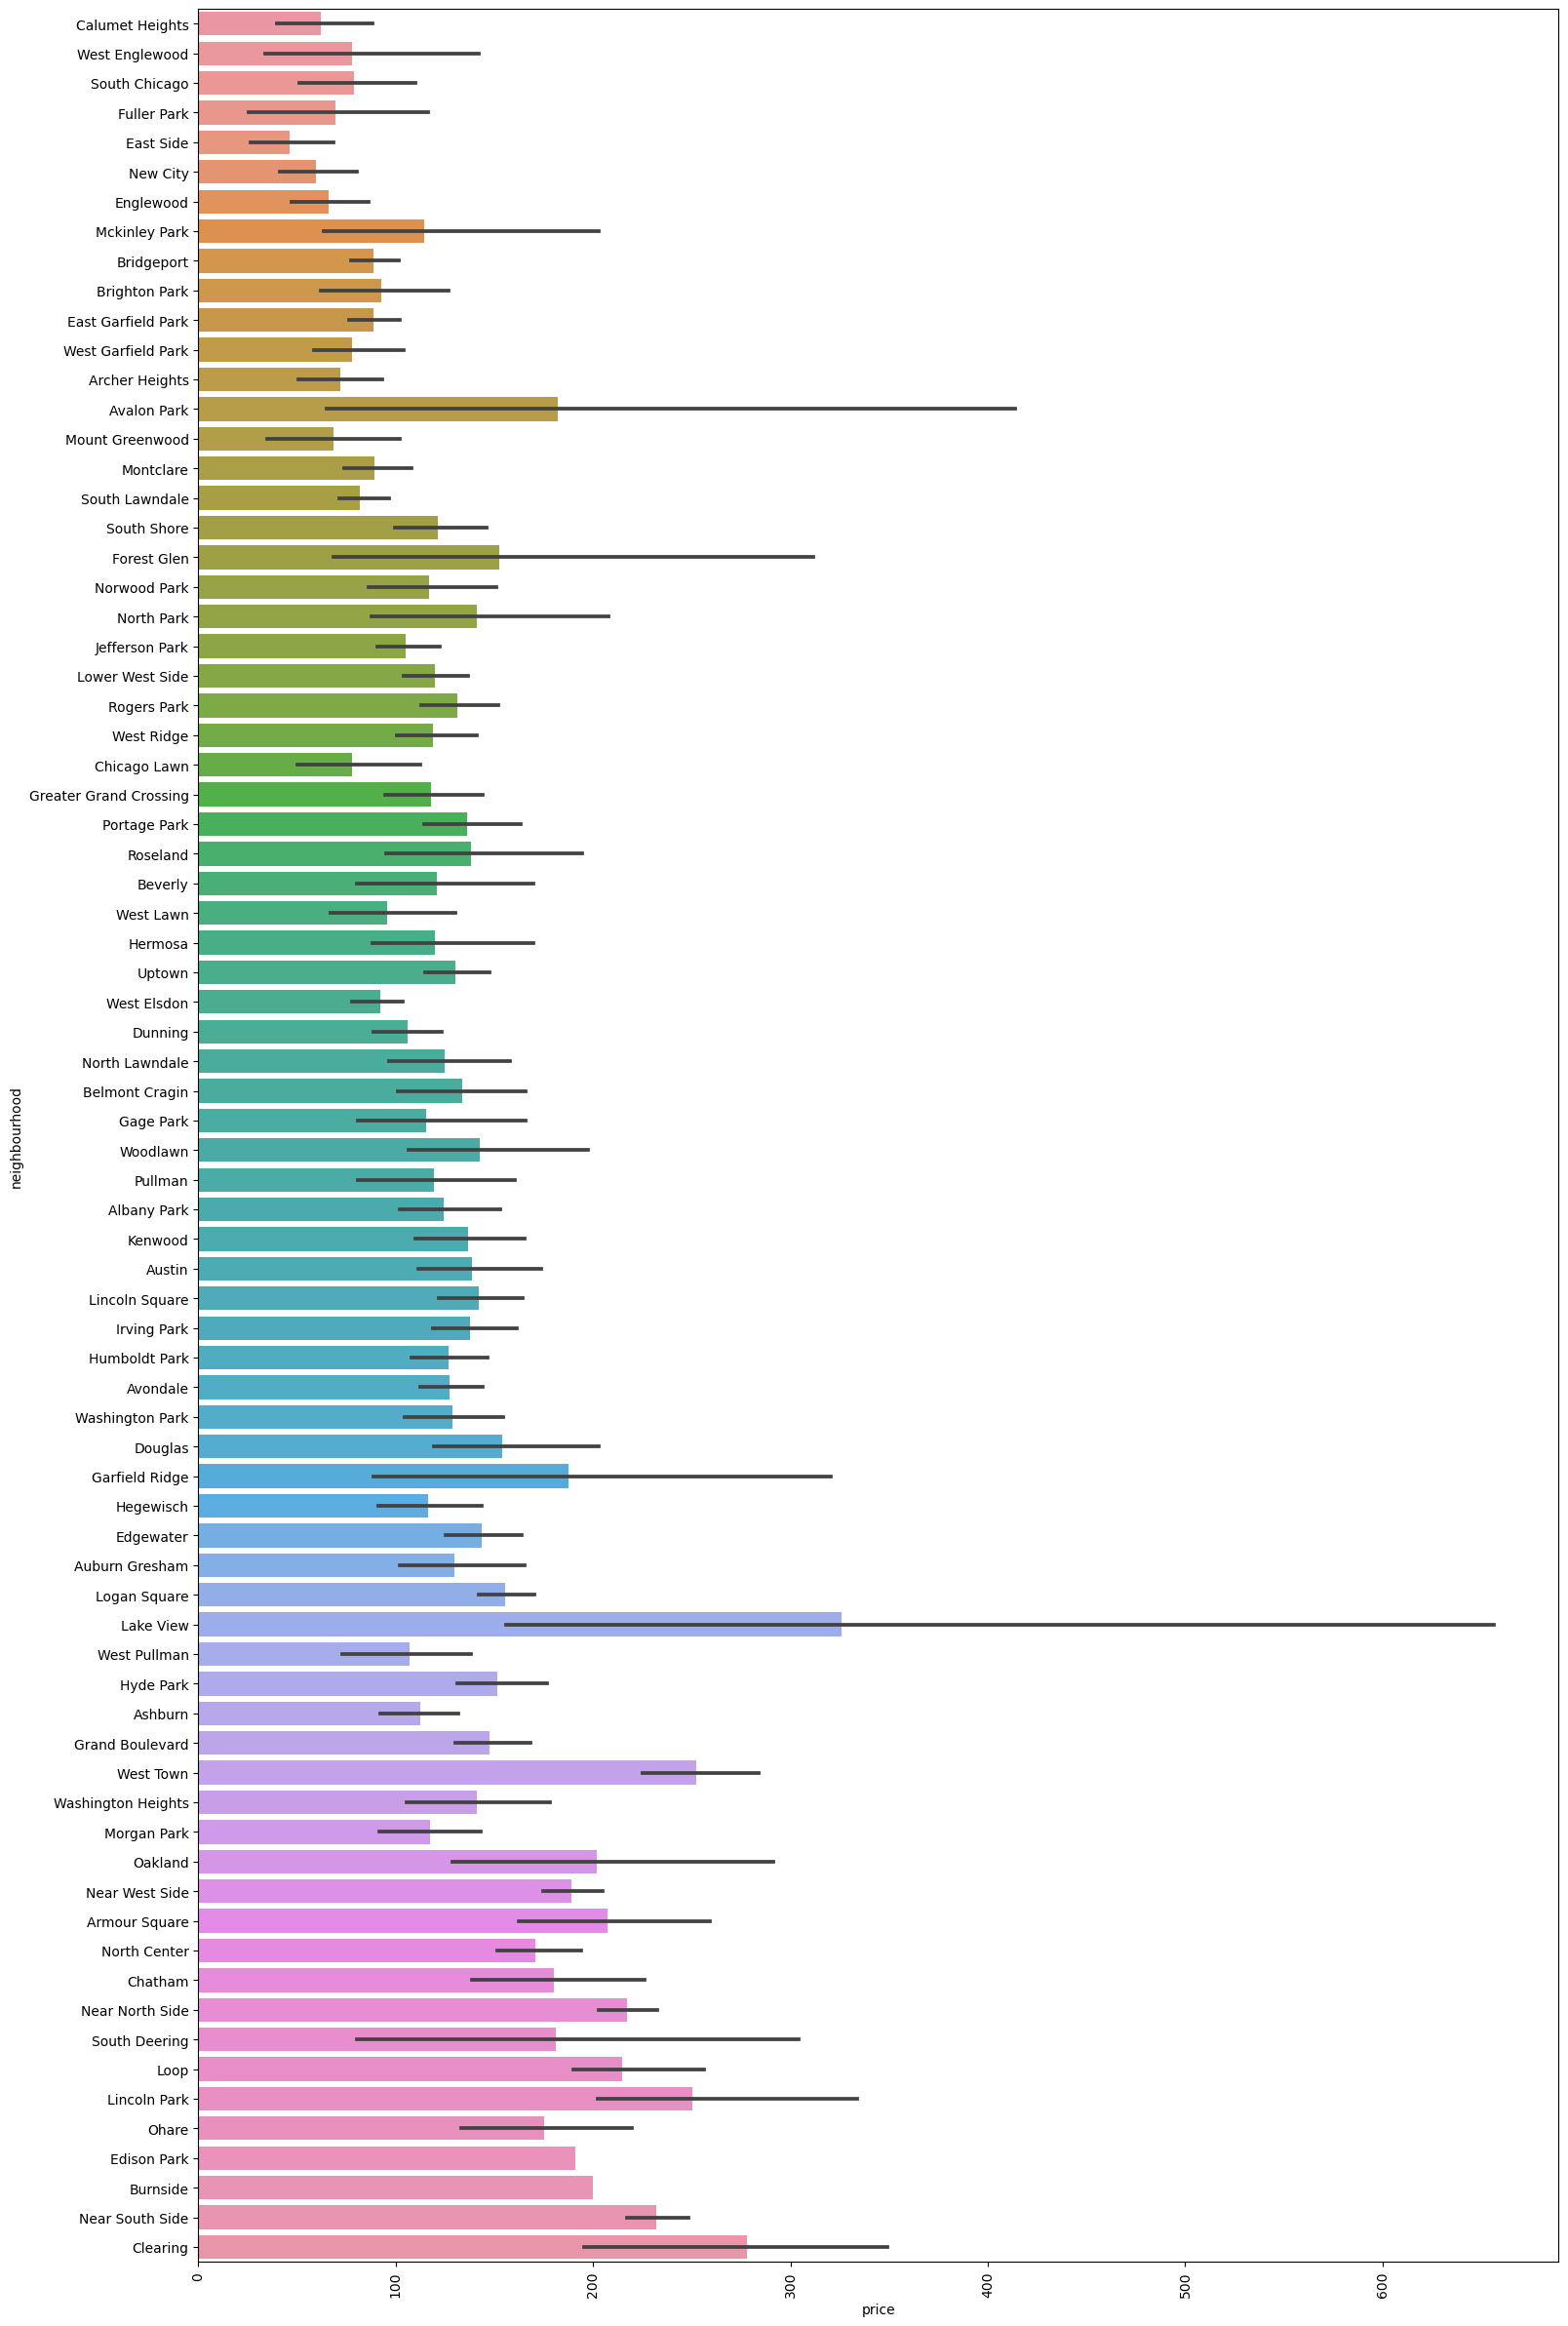

In [15]:
#neighbourhood - price
plt.figure(figsize=(18,30))
result = listing.groupby(['neighbourhood'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='price', y='neighbourhood', data=listing, order=result['neighbourhood'])
plt.xticks(rotation=90)
plt.show()

What type of room gets rented the most?

In [16]:
colors = ['lightskyblue', 'navajowhite', 'plum']
labels = listing.room_type.value_counts().index
values = listing.room_type.value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=2)))
fig.show()

What type of room gets rented out the most in the top 3 locations?

In [17]:
temp_bk = listing[listing.neighbourhood == 'West Town']
temp_qn = listing[listing.neighbourhood == 'Near North Side']
temp_mn = listing[listing.neighbourhood == 'Lake View']

labels = listing.room_type.value_counts().index.to_list()

fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['West Town', 'Near North Side', 'Lake View'])
fig.add_trace(go.Pie(labels=labels, values=temp_mn.room_type.value_counts().reset_index().sort_values(by = 'index').room_type.tolist(), scalegroup='one',
                     name="West Town"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=temp_bk.room_type.value_counts().reset_index().sort_values(by = 'index').room_type.tolist(), scalegroup='one',
                     name="Near North Side"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=temp_qn.room_type.value_counts().reset_index().sort_values(by = 'index').room_type.tolist(), scalegroup='one',
                     name="Lake View"), 1, 3)

fig.update_layout(title_text='Room Types in Top 3 Locations')
fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=2)))
fig.show()

What is the average price for each type of room?

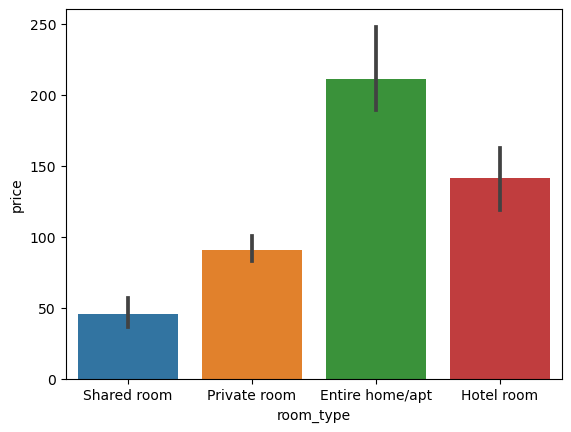

In [18]:
#room_type - price
result = listing.groupby(['room_type'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=listing, order=result['room_type']) 
plt.show()

Let us now look at who the popular hosts are.

In [19]:
listing['host_name'].unique()

array(['Rebecca', 'Mark', 'Joe', ..., 'Yashar', 'Freeman Realtor Co',
       'Caprice'], dtype=object)

In [28]:
temp = listing.host_id.value_counts().reset_index().head(20)
temp.columns = ['host_id', 'count']
temp = temp.merge(listing[['host_id','host_name']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)
temp.drop_duplicates(inplace = True)

x = temp['host_name']
y = temp['count']

fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,250)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Top Airbnb Hosts - Chicago')
fig.layout.xaxis.title = 'Hosts'
fig.layout.yaxis.title = 'Host Listings'
fig.show()

Which neighbourhood is generating maximum and minimum revenues in terms of private rooms,shared rooms and entire homes?

In [21]:
df_n_roomtype = listing.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df_n_roomtype

price
neighbourhood  room_type             
Albany Park    Entire home/apt   7678
               Private room      1130
Archer Heights Entire home/apt    278
               Private room       154
Armour Square  Entire home/apt  11801
...                               ...
West Town      Hotel room        3108
               Private room     19352
               Shared room        303
Woodlawn       Entire home/apt  15986
               Private room      2271

[173 rows x 1 columns]

How much would each type of rental generally cost to rent at the different neighbourhood?

In [22]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood'], columns=['room_type'])
df_neighbourhood_room_type_mean = listing.groupby(['neighbourhood', 'room_type']) \
.agg({'price': 'mean'}).reset_index()

In [23]:
df_neighbourhood_room_type_mean_pivot = listing.groupby(['neighbourhood', 'room_type']) \
.agg({'price': 'mean'}).reset_index()

In [24]:
#renaming a column
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})
#creating a pivot table
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price', 
index=['neighbourhood'], columns=['room_type'])

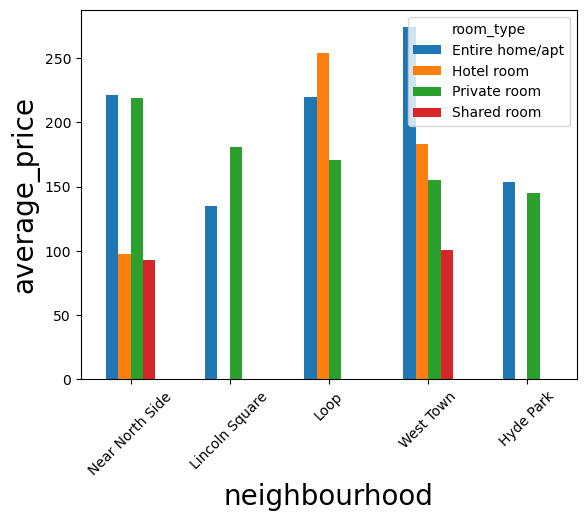

In [25]:
#Plotting 
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=45,labels=labels,fontsize=10)
plt.show()

In [26]:
from wordcloud import WordCloud

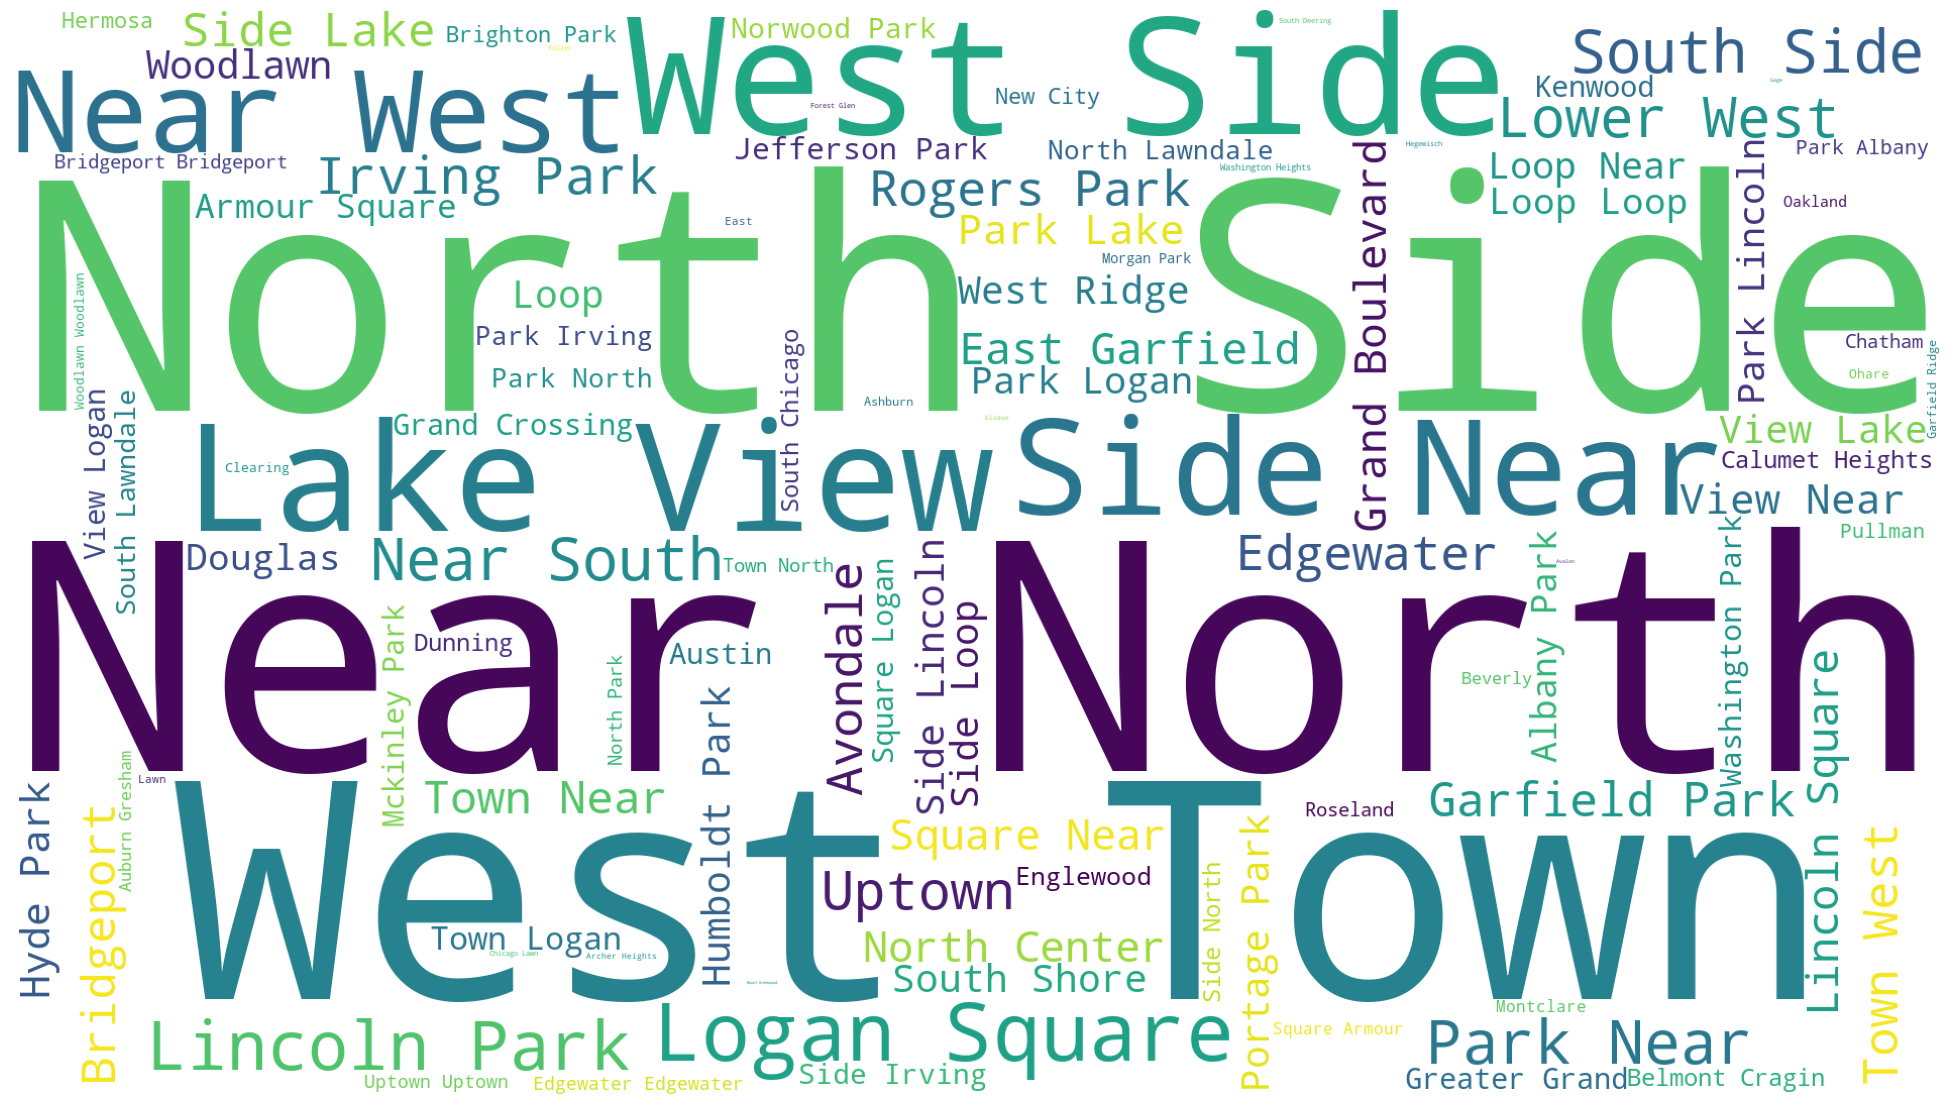

In [27]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(listing.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? No.
2. Do you have any concerns about your dataset? No.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? There are some missing data and possibly some outliers.